# Vectorized operations and label alignment with Series
## vectorization

[pandas documentattion](https://pandas.pydata.org/pandas-docs/stable/index.html) >>  
[Getting started](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) >>  
[Intro to data structures](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#) >>  
[Series](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series)

1. When working with raw NumPy arrays,
   looping through value-by-value is usually not necessary.
   The same is true when working with Series in pandas.
2. Series can also be passed into most NumPy methods expecting an ndarray.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


  k  i  random 1  random 2
  0  a  0.181173  0.529062
  1  b  0.963669  0.823355
  2  c  0.319801  0.294197
  3  d  0.511254  0.485468
  4  e  0.771587  0.917923
  5  f  0.697924  0.236693
  6  g  0.031968  0.537113
  7  h  0.013510  0.614720
  8  i  0.066914  0.257870
  9  j  0.205427  0.442740
 10  k  0.974665  0.330393


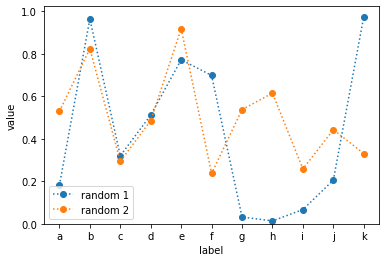

In [2]:
# Create the list of series from random 2D ndarray,
# when an index is passed.

i = list('abcdefghijk')
a = np.random.rand(2, len(i))

s = []
for k in range(a.shape[0]):
    s.append(pd.Series(a[k], index=i, name=f'random {k + 1}'))

print('{:>3}{:>3}{:>10}{:>10}'.
      format('k', 'i', s[0].name, s[1].name))
for k in range(s[0].size):
    print('{:>3}{:>3}{:>10.6f}{:>10.6f}'.
          format(k, s[0].index[k], s[0][k], s[1][k]),
          sep='')

for x in s:
    plt.plot(x, 'o:', label=x.name)
plt.ylim(ymin=0)
plt.xlabel(xlabel='label')
plt.ylabel(ylabel='value')
plt.legend()
plt.show()


  k  i  random 1  random 2  random +  random -
  0  a  0.181173  0.529062  0.710235 -0.347889
  1  b  0.963669  0.823355  1.787024  0.140314
  2  c  0.319801  0.294197  0.613998  0.025604
  3  d  0.511254  0.485468  0.996722  0.025786
  4  e  0.771587  0.917923  1.689510 -0.146336
  5  f  0.697924  0.236693  0.934617  0.461231
  6  g  0.031968  0.537113  0.569080 -0.505145
  7  h  0.013510  0.614720  0.628230 -0.601210
  8  i  0.066914  0.257870  0.324783 -0.190956
  9  j  0.205427  0.442740  0.648168 -0.237313
 10  k  0.974665  0.330393  1.305058  0.644272


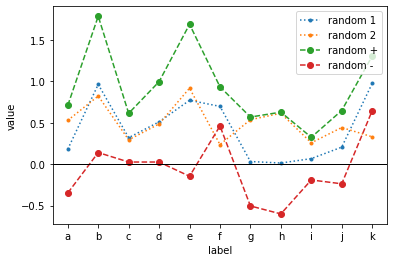

In [3]:
# Apply arithmetic operations:
# addition and subtraction,
# to series.

s_1 =[s[0] + s[1],
      s[0] - s[1]]
s_1[0] = s_1[0].rename('random +')
s_1[1] = s_1[1].rename('random -')

print('{:>3}{:>3}{:>10}{:>10}{:>10}{:>10}'.
      format('k', 'i', s[0].name, s[1].name, s_1[0].name, s_1[1].name))
for k in range(s[0].size):
    print('{:>3}{:>3}{:>10.6f}{:>10.6f}{:>10.6f}{:>10.6f}'.
          format(k, s[0].index[k], s[0][k], s[1][k], s_1[0][k], s_1[1][k]),
          sep='')

for x in s:
    plt.plot(x, '.:', label=x.name)
for x in s_1:
    plt.plot(x, 'o--', label=x.name)
plt.axhline(y=0, linewidth=1, color='k')
plt.xlabel(xlabel='label')
plt.ylabel(ylabel='value')
plt.legend()
plt.show()


  k  i  random 1  random 2  random *
  0  a  0.181173  0.529062  0.095852
  1  b  0.963669  0.823355  0.793441
  2  c  0.319801  0.294197  0.094085
  3  d  0.511254  0.485468  0.248198
  4  e  0.771587  0.917923  0.708258
  5  f  0.697924  0.236693  0.165194
  6  g  0.031968  0.537113  0.017170
  7  h  0.013510  0.614720  0.008305
  8  i  0.066914  0.257870  0.017255
  9  j  0.205427  0.442740  0.090951
 10  k  0.974665  0.330393  0.322022

random /
a    0.342442
b    1.170418
c    1.087029
d    1.053116
e    0.840579
f    2.948648
g    0.059518
h    0.021977
i    0.259486
j    0.463991
k    2.950016
Name: random /, dtype: float64


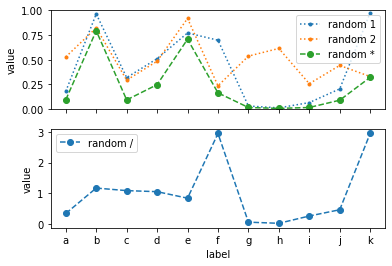

In [4]:
# Apply arithmetic operations:
# multiplication and division,
# to series.

s_1 =[s[0] * s[1],
      s[0] / s[1]]
s_1[0] = s_1[0].rename('random *')
s_1[1] = s_1[1].rename('random /')

print('{:>3}{:>3}{:>10}{:>10}{:>10}'.
      format('k', 'i', s[0].name, s[1].name, s_1[0].name))
for k in range(s[0].size):
    print('{:>3}{:>3}{:>10.6f}{:>10.6f}{:>10.6f}'.
          format(k, s[0].index[k], s[0][k], s[1][k], s_1[0][k]),
          sep='')
print('', s_1[1].name, s_1[1], sep='\n')

fig, ax = plt.subplots(nrows=2, ncols=1, sharex = True)

for x in s:
    ax[0].plot(x, '.:', label=x.name)
ax[0].plot(s_1[0], 'o--', label=s_1[0].name)
ax[0].set_ylim(ymin=0, ymax=1)
ax[0].set_ylabel(ylabel='value')
ax[0].legend()

ax[1].plot(s_1[1], 'o--', label=s_1[1].name)
ax[1].set_xlabel(xlabel='label')
ax[1].set_ylabel(ylabel='value')
ax[1].legend()

plt.show()


  k  i  random 1  arcsin 1  arccos 1
  0  a  0.181173  0.182179  1.388617
  1  b  0.963669  1.300414  0.270382
  2  c  0.319801  0.325520  1.245277
  3  d  0.511254  0.536644  1.034153
  4  e  0.771587  0.881332  0.689464
  5  f  0.697924  0.772495  0.798301
  6  g  0.031968  0.031973  1.538823
  7  h  0.013510  0.013510  1.557286
  8  i  0.066914  0.066964  1.503833
  9  j  0.205427  0.206900  1.363896
 10  k  0.974665  1.345217  0.225579


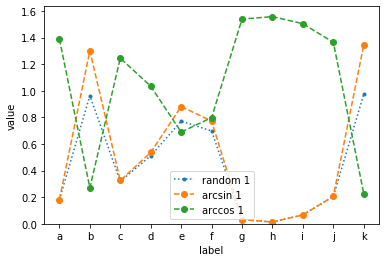

In [5]:
# Apply trigonometric functions:
# arcsin and arccos,
# to series.

s_1 =[np.arcsin(s[0]),
      np.arccos(s[0])]
s_1[0] = s_1[0].rename('arcsin 1')
s_1[1] = s_1[1].rename('arccos 1')

print('{:>3}{:>3}{:>10}{:>10}{:>10}'.
      format('k', 'i', s[0].name, s_1[0].name, s_1[1].name))
for k in range(s[0].size):
    print('{:>3}{:>3}{:>10.6f}{:>10.6f}{:>10.6f}'.
          format(k, s[0].index[k], s[0][k], s_1[0][k], s_1[1][k]),
          sep='')

plt.plot(s[0], '.:', label=s[0].name)
for x in s_1:
    plt.plot(x, 'o--', label=x.name)
plt.ylim(ymin=0)
plt.xlabel(xlabel='label')
plt.ylabel(ylabel='value')
plt.legend()
plt.show()
